Obtain this dataset (Links to an external site.) (in Excel) that contains information about users' domain knowledge. There are five variables that you can think of as attributes of a user, and one categorical variable that you can think of as a class label for that user. The original study details are in the following paper.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Ignore the class label variable and focus on the five attributes. Using these attributes, cluster the users with two different methods of clustering. Provide your observations and comparisons. Now assuming that you can use these clusters for labeling the datapoints, report your classification accuracy with respect to the truth data available in that last column.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler

from collections import Counter

In [2]:
df = pd.read_excel("./data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", 
                   sheet_name ="Training_Data", usecols = ('A:F'))
df.head(3)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low


In [3]:
df[" UNS"].groupby(df[' UNS']).count()

 UNS
High        63
Low         83
Middle      88
very_low    24
Name:  UNS, dtype: int64

In [4]:
## model : kmean
X = df.iloc[:,0:5]
num_group = 4
print("# groups:", num_group)
#scaler = preprocessing.StandardScaler()
#scaler.fit_transform(X)

kmeans = KMeans(n_clusters=num_group)

# Fitting the model
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
print(centroids)
print(y_kmeans)

# groups: 4
[[0.34898485 0.32692424 0.23780303 0.24348485 0.56575758]
 [0.60445455 0.43806061 0.50757576 0.75333333 0.67878788]
 [0.36981081 0.36948649 0.68986486 0.24594595 0.56260811]
 [0.29894118 0.33398824 0.43823529 0.61776471 0.19917647]]
[0 0 0 3 3 0 0 3 3 0 2 3 3 2 2 2 2 0 0 0 3 0 0 3 3 2 3 3 3 2 2 3 3 0 0 3 3
 0 3 3 3 2 2 3 3 2 2 2 1 0 0 0 3 0 0 3 3 2 2 3 3 2 2 3 3 0 0 0 0 0 0 0 3 2
 2 3 3 2 2 2 3 0 0 3 3 3 0 3 3 2 2 3 3 2 2 3 3 0 0 0 3 0 0 3 3 2 2 2 3 2 2
 2 1 0 0 3 3 1 2 2 3 3 2 2 1 1 2 2 3 3 0 0 3 1 0 0 3 3 2 2 3 3 2 2 2 1 0 3
 3 1 0 0 3 3 2 2 2 1 2 2 3 3 0 0 3 0 0 1 3 0 2 2 1 3 2 2 3 1 0 0 3 1 0 0 3
 3 2 2 3 1 2 2 2 1 0 0 3 3 0 3 3 1 2 2 1 3 2 2 3 1 0 0 1 1 2 0 3 1 2 2 3 1
 2 2 3 1 0 0 1 1 0 0 3 1 2 2 3 1 2 2 3 1 0 0 3 1 0 0 1 1 2 2 3 1 2 2 3 1]


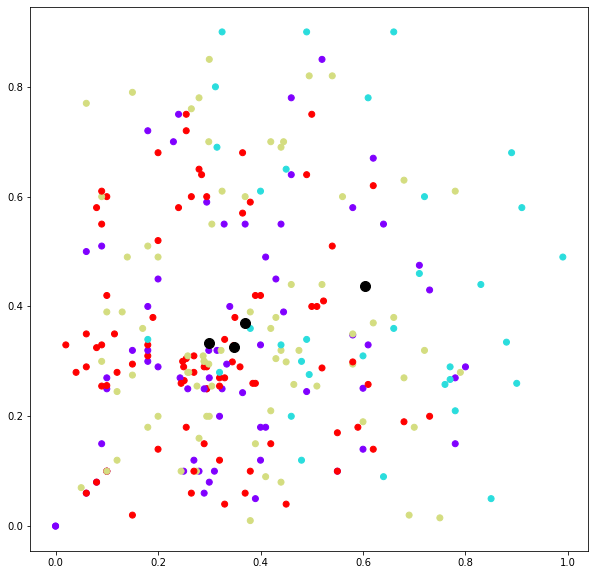

In [5]:
# Visualize the clusters
plt.figure(figsize=(10,10))
plt.scatter(X['STG'], X['SCG'], c = y_kmeans, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100)
plt.show()# Visualize the clusters

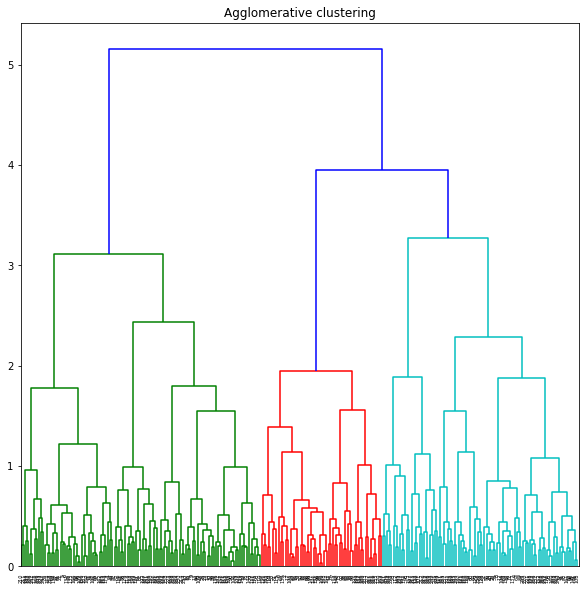

In [8]:
#Visualizing the data
plt.figure(figsize =(10, 10)) 
plt.title('Agglomerative clustering') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward'))) 

#Making the object of Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters = 4) 
y_ac = ac.fit_predict(X)

In [13]:
pred_kmeans = sorted(Counter(y_kmeans).items(), key=lambda x: x[1], reverse=True)
pred_kmeans

[(3, 85), (2, 74), (0, 66), (1, 33)]

In [14]:
pred_ac = sorted(Counter(y_ac).items(), key=lambda x: x[1], reverse=True)
pred_ac

[(0, 111), (1, 65), (2, 56), (3, 26)]

In [15]:
truth = sorted(Counter(df[" UNS"]).items(), key=lambda x: x[1], reverse=True)
truth

[('Middle', 88), ('Low', 83), ('High', 63), ('very_low', 24)]

In [16]:
acc_count = 0
for i in range(4):
    print(truth[i], pred_kmeans[i])
    if truth[i][1] >= pred_kmeans[i][1]:
        acc_count += pred_kmeans[i][1]
    else:
        acc_count += truth[i][1]
accuracy = round(acc_count/len(df), 3)
print("classification accuracy for Kmeans:", accuracy)

('Middle', 88) (3, 85)
('Low', 83) (2, 74)
('High', 63) (0, 66)
('very_low', 24) (1, 33)
classification accuracy for Kmeans: 0.953


In [17]:
acc_count = 0
for i in range(4):
    print(truth[i], pred_ac[i])
    if truth[i][1] >= pred_ac[i][1]:
        acc_count += pred_ac[i][1]
    else:
        acc_count += truth[i][1]
accuracy = round(acc_count/len(df), 3)
print("classification accuracy for Agglomerative Clustering :", accuracy)

('Middle', 88) (0, 111)
('Low', 83) (1, 65)
('High', 63) (2, 56)
('very_low', 24) (3, 26)
classification accuracy for Agglomerative Clustering : 0.903
